In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#base libs
import sklearn
import numpy as np

#dataset
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as split

#visualization
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

#metrics
from sklearn.metrics import classification_report, confusion_matrix 

In [14]:
df = pd.read_csv('train.csv')

In [15]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [16]:
df['Age'] = df['Age'].round().astype('Int64')
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin'] = df['Cabin'].str[0]
# df = pd.get_dummies(df, columns=['Cabin'], drop_first=False)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

categorical_cols = ['Sex', 'Embarked', 'Cabin']
df = pd.get_dummies(df, columns=categorical_cols)


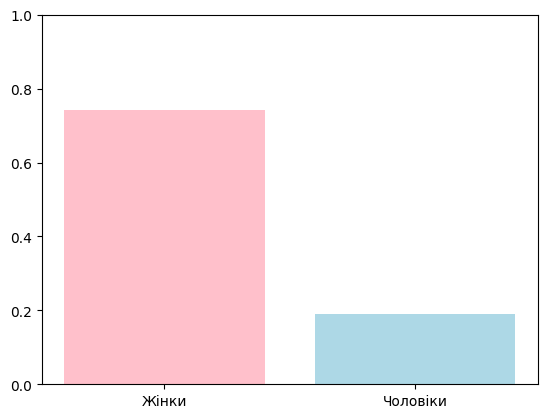

In [17]:
df['IsChild'] = (df['Age'] <= 14).astype(int)

surv_gender = [df[df['Sex_female'] == 1]['Survived'].mean(),
               df[df['Sex_female'] == 0]['Survived'].mean()]
plt.bar(['Жінки', 'Чоловіки'], surv_gender, color=['pink', 'lightblue'])
plt.ylim(0, 1)
plt.show()

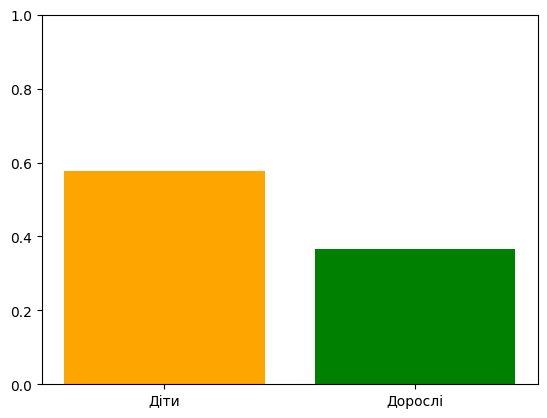

In [19]:
surv_child = [df[df['IsChild'] == 1]['Survived'].mean(),
              df[df['IsChild'] == 0]['Survived'].mean()]
plt.bar(['Діти', 'Дорослі'], surv_child, color=['orange', 'green'])
plt.ylim(0, 1)
plt.show()

In [25]:
MMScaler = MinMaxScaler()
df[['Age', 'Fare']] = MMScaler.fit_transform(df[['Age', 'Fare']])

y = df['Survived']
X = df.drop(columns=['Survived'])

In [26]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, random_state=11)

In [27]:
print(df.columns.tolist())

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'IsChild']


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=6,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )),
    ('svc', SVC(
        C=15,
        kernel='rbf',
        gamma=0.1,
        probability=True,
        random_state=42
    )),
    ('lr', LogisticRegression(
        solver='lbfgs',
        C=0.8,
        penalty='l2',
        max_iter=2000,
        random_state=42
    )),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',
        solver='adam',
        learning_rate='adaptive',
        alpha=0.001,
        max_iter=1500,
        random_state=42
    ))
]

voting_model = VotingClassifier(estimators=estimators, voting='soft')
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8682    0.9492    0.9069       118
           1     0.8800    0.7213    0.7928        61

    accuracy                         0.8715       179
   macro avg     0.8741    0.8352    0.8498       179
weighted avg     0.8722    0.8715    0.8680       179

